## 송재환_유니콘기업분석_EDA

- 적정 수준의 직원과 연봉을 유지하면서, 높은 매출액을 유지하는 회사가 가치가 큰 회사로 보인다.
- Boxplot과 Scatter chart의 해석을 근거로 함.
- 위 내용을 기준으로 후보 기업군을 선정하고, 후보 기업군의 세부 분석을 통해 유니콘 기업을 발견한다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# (Windows OS) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'MalgunGothic'  

# (MAC OS)
plt.rcParams['font.family'] = 'AppleGothic'  

# 문자 - (마이너스) 정상 출력을 위한 코드
plt.rcParams['axes.unicode_minus'] = False

# 경고 제거
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
# 데이터 파일 read
wanted_nps_df=pd.read_csv('company_nps_data.csv', encoding='cp949')

In [3]:
wanted_nps_df.info()
wanted_nps_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


회사ID          연매출액            년도             월      월별_연금보험료  \
count  9.980100e+04  9.980100e+04  99801.000000  99801.000000  9.980100e+04   
mean   2.762982e+05  3.053589e+07   2016.967125      6.714352  9.734079e+06   
std    1.339032e+05  3.016647e+08      0.976688      3.512966  4.347256e+07   
min    6.300000e+01 -7.882176e+06   2015.000000      1.000000  0.000000e+00   
25%    1.655300e+05  1.409760e+06   2016.000000      4.000000  1.181160e+06   
50%    2.591490e+05  3.573585e+06   2017.000000      7.000000  2.332760e+06   
75%    3.826560e+05  9.582321e+06   2018.000000     10.000000  5.591860e+06   
max    5.159723e+06  1.132878e+10   2019.000000     12.000000  9.780673e+08   

             월별_직원수  
count  99801.000000  
mean      37.623431  
std      146.947194  
min        0.000000  
25%        6.000000  
50%       11.000000  
75%       24.000000  
max     3133.000000

### 데이터 편집
* 가져온 데이터를 추가 활용하기 위해 직원 1명당 매출액을 보여주는 컬럼 추가

In [4]:
# 월별 연금 보험료와 월별 직원수가 0인 경우 제외 처리
wanted_nps_df = wanted_nps_df.drop(index=wanted_nps_df.query('월별_직원수 == 0').index)

In [5]:
wanted_nps_df.loc[:,'인당_매출액'] = wanted_nps_df.loc[:, '연매출액'] / wanted_nps_df.loc[:, '월별_직원수']

In [6]:
# 데이터의 통계량
wanted_nps_df.describe()

회사ID          연매출액            년도             월      월별_연금보험료  \
count  9.978800e+04  9.978800e+04  99788.000000  99788.000000  9.978800e+04   
mean   2.762820e+05  3.053943e+07   2016.967140      6.714515  9.735347e+06   
std    1.338940e+05  3.016841e+08      0.976691      3.512956  4.347525e+07   
min    6.300000e+01 -7.882176e+06   2015.000000      1.000000  9.000000e+04   
25%    1.655300e+05  1.409760e+06   2016.000000      4.000000  1.181860e+06   
50%    2.591490e+05  3.573585e+06   2017.000000      7.000000  2.333680e+06   
75%    3.826560e+05  9.584106e+06   2018.000000     10.000000  5.591960e+06   
max    5.159723e+06  1.132878e+10   2019.000000     12.000000  9.780673e+08   

             월별_직원수        인당_매출액  
count  99788.000000  9.978800e+04  
mean      37.628332  5.942074e+05  
std      146.956138  1.477259e+06  
min        3.000000 -1.576435e+06  
25%        6.000000  1.418792e+05  
50%       11.000000  2.861774e+05  
75%       24.000000  5.865000e+05  
max     3133.000000  5.078475e+07

In [7]:
# 회사ID 고유 건수
len(set(wanted_nps_df['회사ID']))

4998

### 데이터 통계
* 4998개 기업의 2015년~2019년까지의 데이터
***
- 최대 연매출액: 약 113억원
- 최대 월별 연금보험료: 약 9억 7천만원
- 최대 월별 직원수: 약 3100명
***
- 평균 연매출액: 약 3천만원
- 평균 월별 연금보험료: 약 970만원
- 평균 월별 직원수: 약 37명
***
- 최소 연매출액: 약 -788만원
- 최소 월별 연금보험료: 약 9만원
- 최소 월별 직원수: 3명

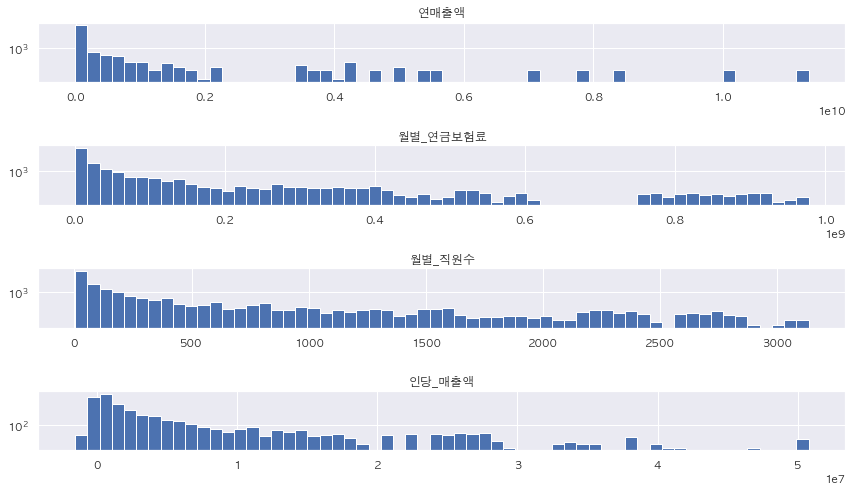

In [8]:
# 히스토그램을 통해 데이터 분포를 시각화
# 값이 작은 회사가 압도적으로 많기 때문에 전체적인 내용 확인을 위해 값에 log를 적용
wanted_nps_df.hist(bins=60, column=['연매출액','월별_연금보험료','월별_직원수','인당_매출액'],
                 figsize=(12,7), layout=(4,1), log=True);
plt.tight_layout()

In [9]:
# 위 히스토그램의 영역을 binning하여 그룹핑
# binning 작업: 데이터를 값으로 오름차순 정렬하여, 동일한 개수가 되도록 bin 그룹을 나눔

# 전체 Rows를 기준으로 5개의 bin으로 구분
n_bins = 5
# bin의 이름(라벨)
bin_labels = list(range(1,n_bins+1))

for column in ['연매출액','월별_연금보험료','월별_직원수','인당_매출액']:
    new_column = column+"bin"
    wanted_nps_df.loc[:,new_column] = pd.qcut(wanted_nps_df[column], n_bins, labels=bin_labels)
    
wanted_nps_df

회사ID      연매출액    년도   월  월별_연금보험료  월별_직원수        인당_매출액 연매출액bin  \
0      233757  41688077  2018   7   8912380      36  1.158002e+06       5   
1      123464   1760695  2018   3    942380       5  3.521390e+05       2   
2      342124   3221341  2018   7    781180       4  8.053352e+05       3   
3      386420   4815584  2015  11   3795900      14  3.439703e+05       3   
4      129243   9799736  2018  10  40724680     151  6.489891e+04       4   
...       ...       ...   ...  ..       ...     ...           ...     ...   
99796  171439   4630622  2017   2   2402740      11  4.209656e+05       3   
99797  239388   1045021  2018  10   1428800       9  1.161134e+05       1   
99798  272304    181898  2018   3    392560       4  4.547450e+04       1   
99799  362194   2100218  2018  12    874780       3  7.000727e+05       2   
99800  124281    132900  2017  11    291940       5  2.658000e+04       1   

      월별_연금보험료bin 월별_직원수bin 인당_매출액bin  
0               5         5         5  
1               1         1         3  
2               1         1         5  
3               4         3         3  
4               5         5         1  
...           ...       ...       ...  
99796           3         3         4  
99797           2         3         1  
99798           1         1         1  
99799           1         1         4  
99800           1         1         1  

[99788 rows x 11 columns]

### Binning을 기준으로 데이터 EDA (Boxplot & Scatter chart 활용)<br>

#### 1. Boxplot 해석 요약

--------

- 연매출액bin, 월별 연금보혐료bin, 월별 직원수bin이 클수록 (5번에 가까워질수록)<br>연매출액, 월별 연금보혐료, 월별 직원수의 스펙트럼(분포 차이)가 더 넓어진다.<br>가장 높은 5번 bin의 경우 각 항목들의 5번 bin에서  상위 50%를 기준으로 굉장히 넓은 분포를 가진다.

- 연매출액bin, 1인당 매출액bin이 클수록(5번에 가까워질수록) 연매출액의 스펙트럼이 더 넓어진다.<br>특히 1인당 매출액의 5번 bin에서 상위 50%를 기준으로 굉장히 넓은 분포를 가진다.

- But, 연매출액이 가장 크고, 1인당 매출액이 가장 적은 bin일수록<br>월별 연금보험료와 월별 직원수가 더 많아진다. (상위 50% 기준으로 더 벌어짐)

##### (추론)
1. 회사의 규모가 커질수록 더 급격한 가치 성장이 이뤄지는 것으로 추측.
2. 1인당 매출액이 연매출액과 강한 연관이 있는 것으로 추측.
3. 직원이 많을수록 매출 대비 급여(고정비)가 낮은 가치를 내는 것으로 추측.


##### (정리)
1. 연매출액과 1인당 매출이 함께 크면서도, 직원이 적어 고정비가 적게 운영될 수 있는 기업이 유니콘으로 보인다.
2. 규모가 큰 기업들에 초점을 맞춰 미시적인 분석이 필요할 것으로 보임.

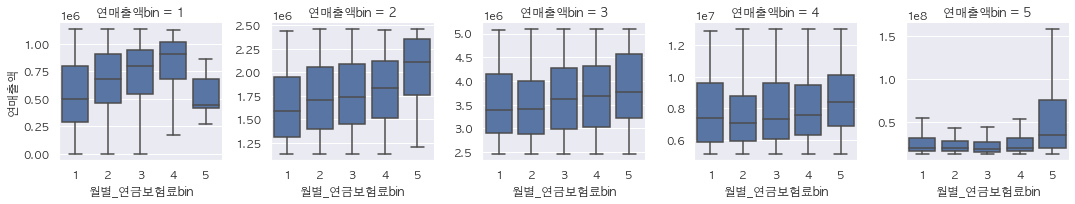

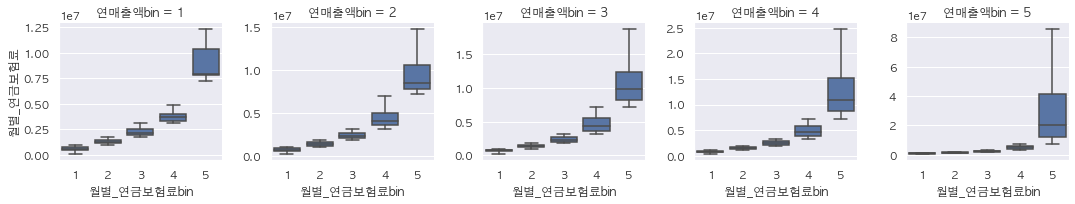

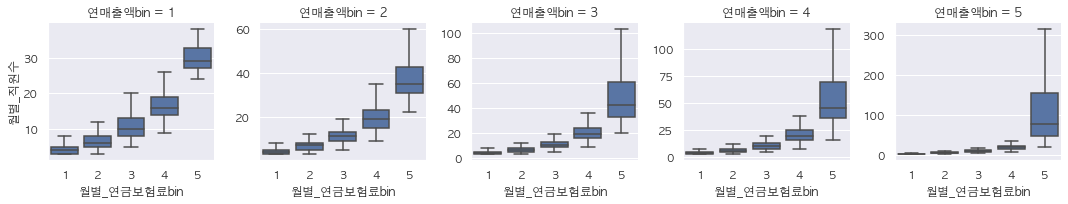

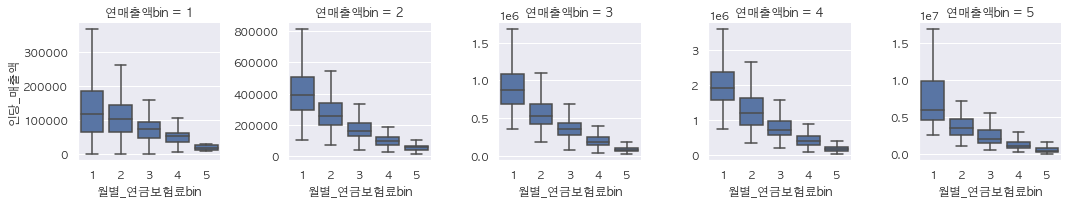

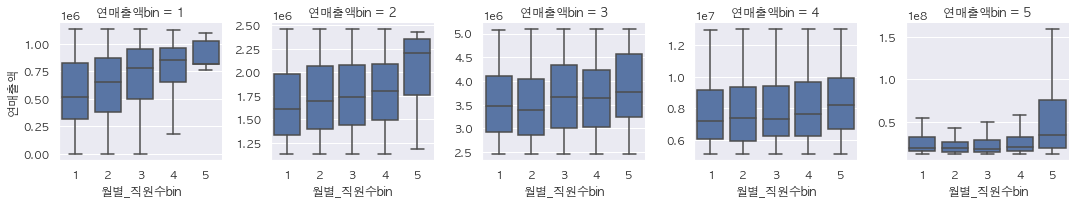

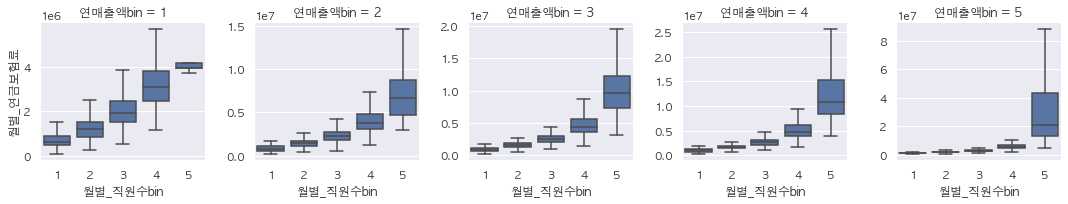

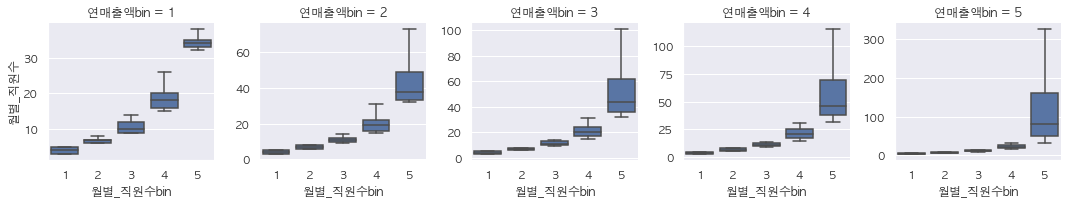

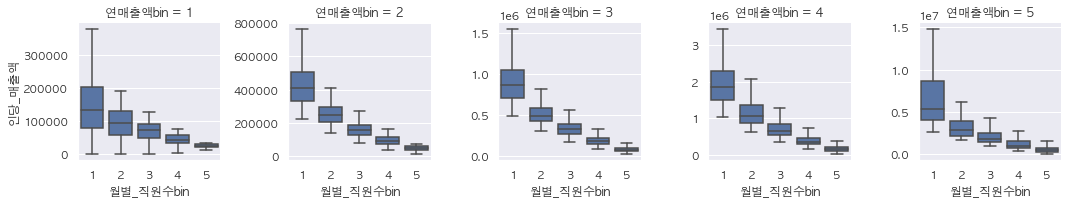

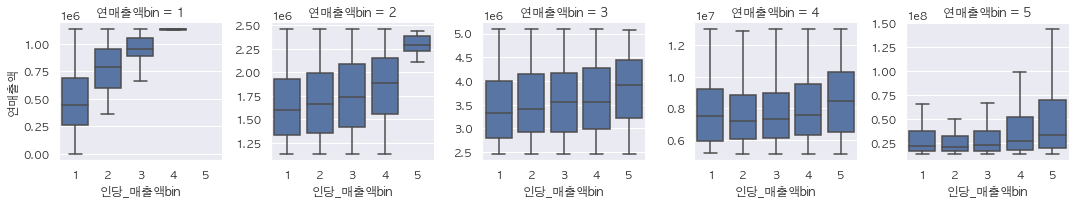

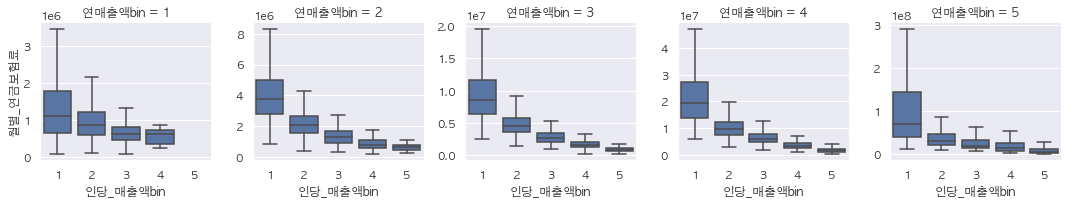

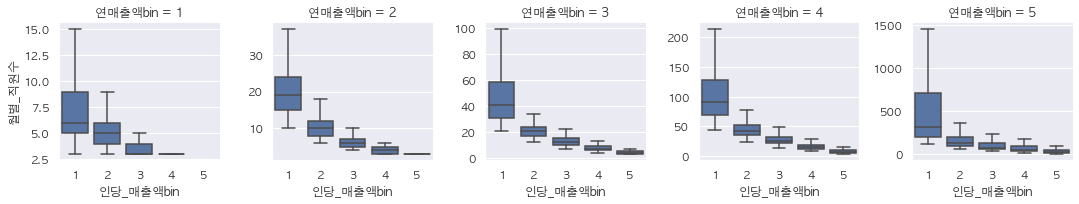

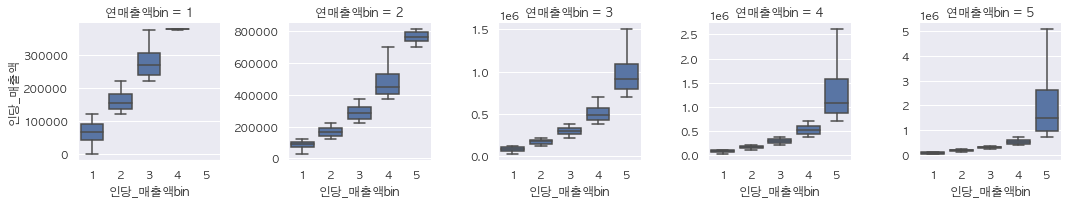

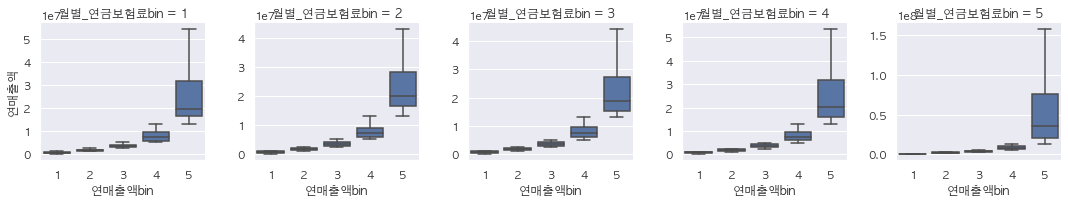

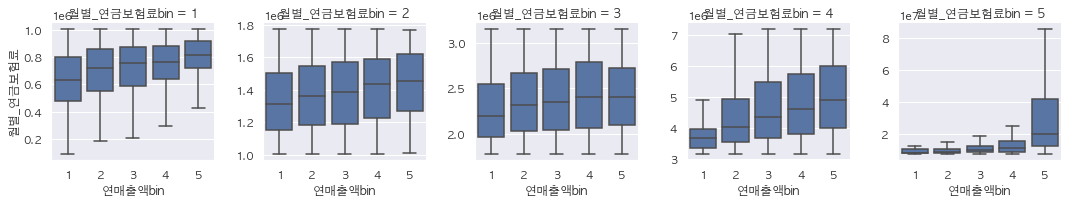

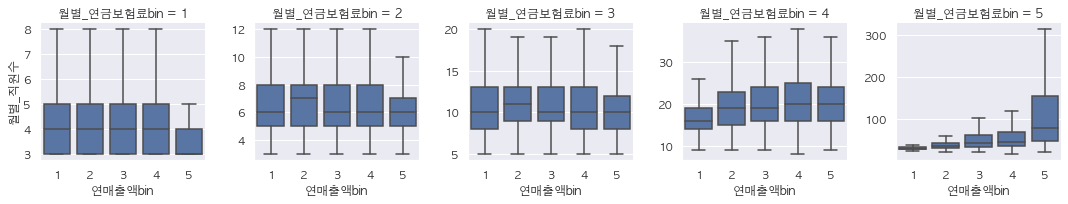

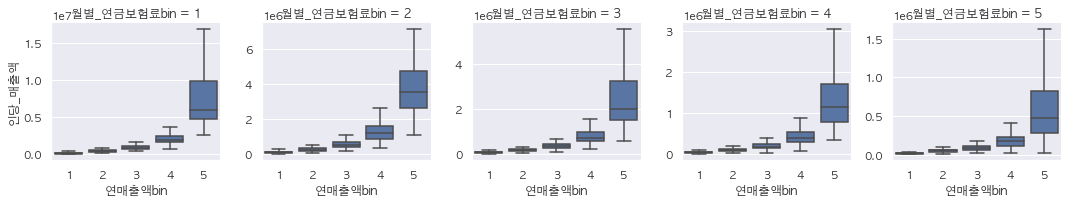

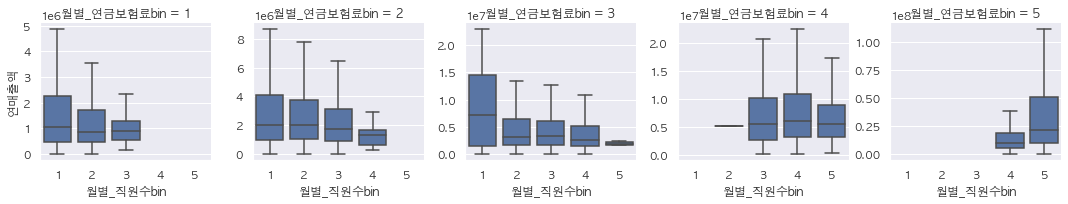

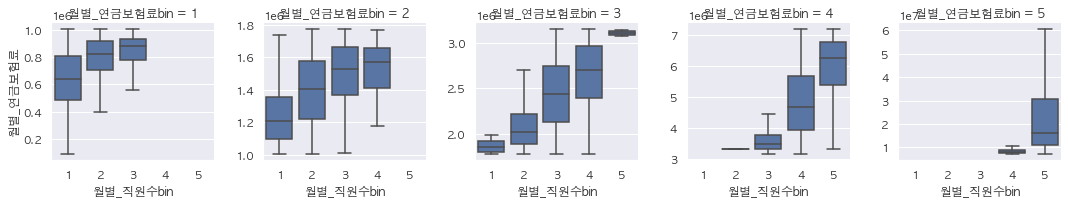

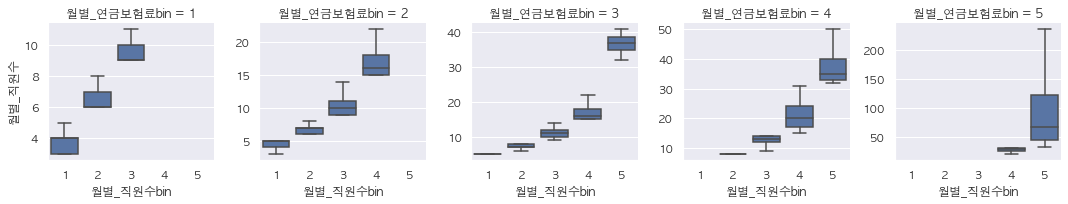

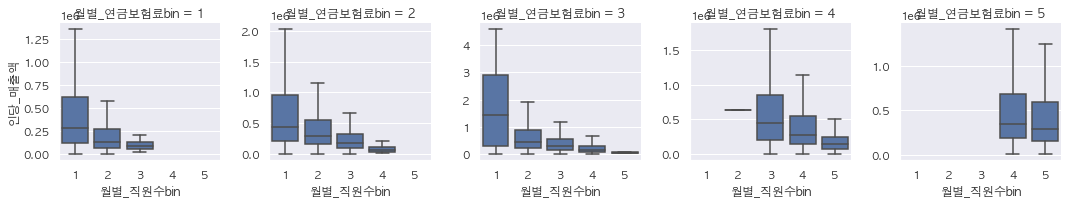

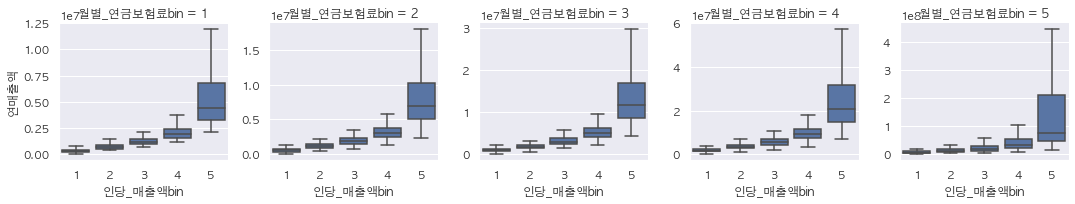

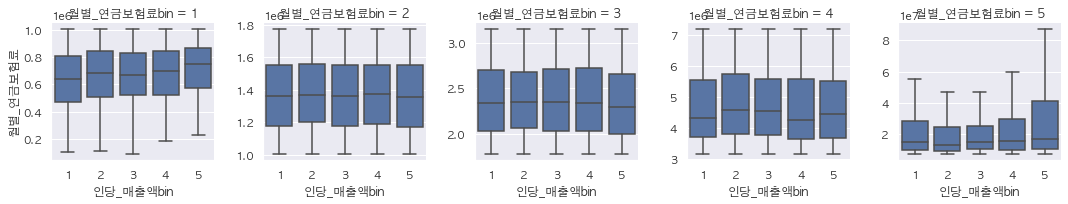

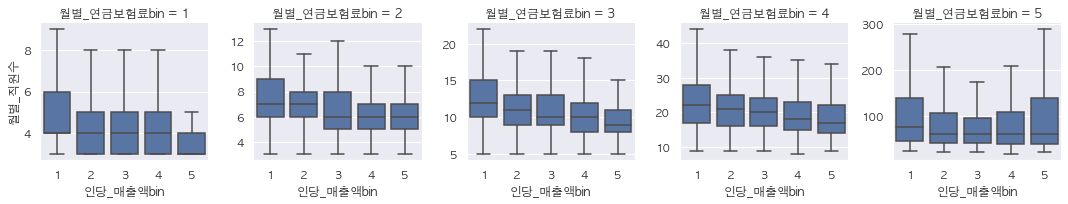

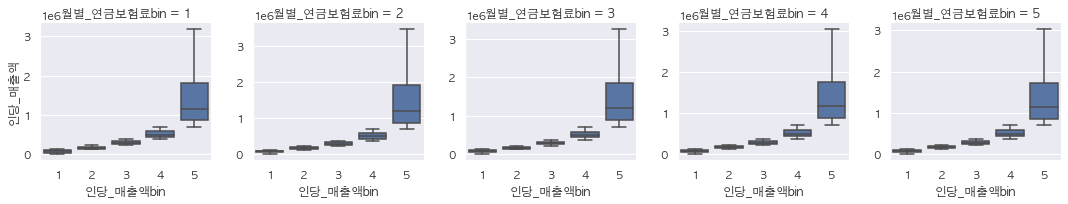

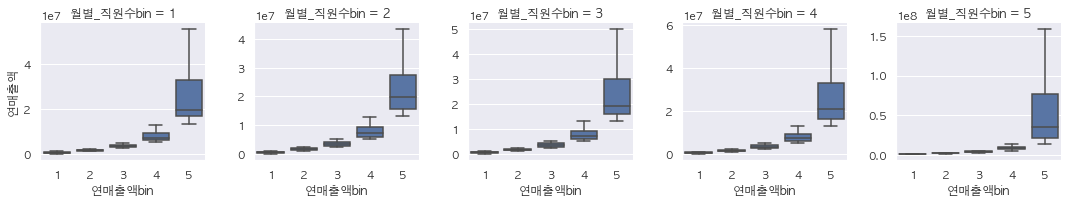

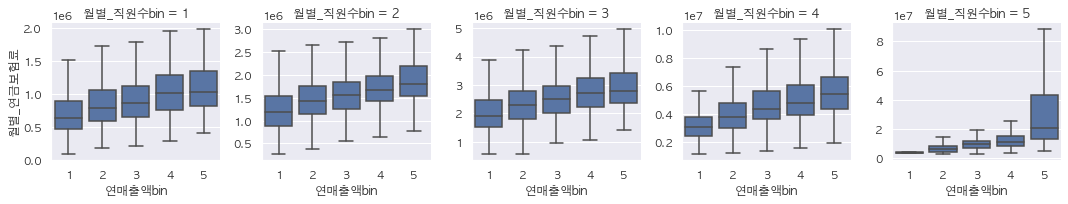

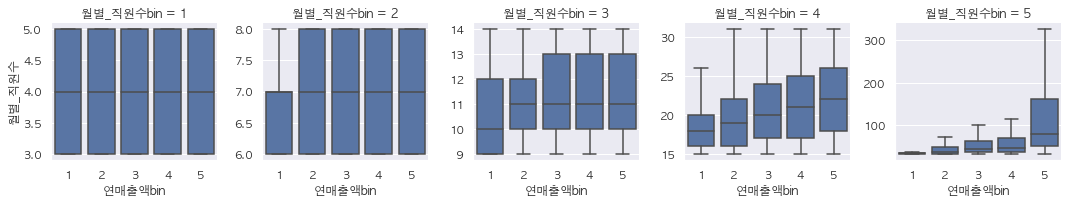

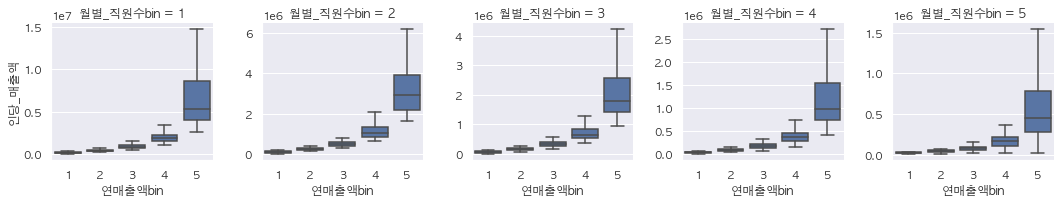

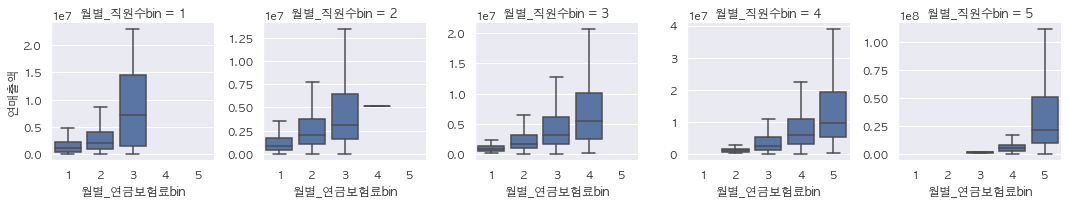

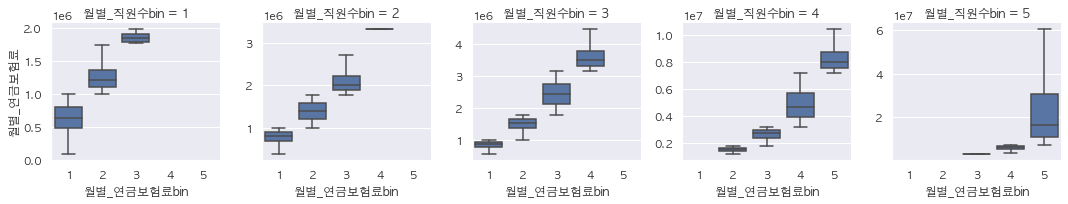

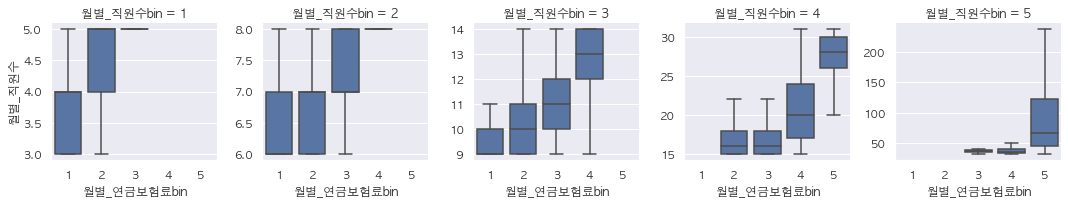

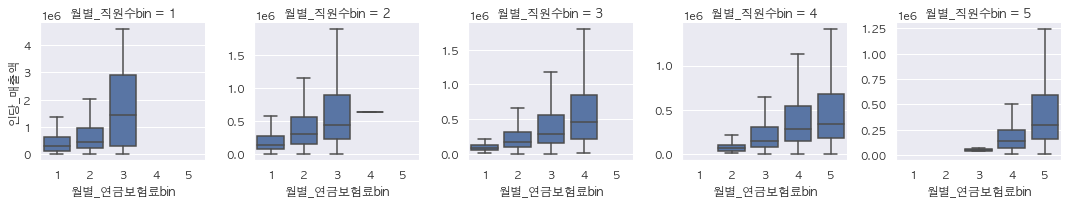

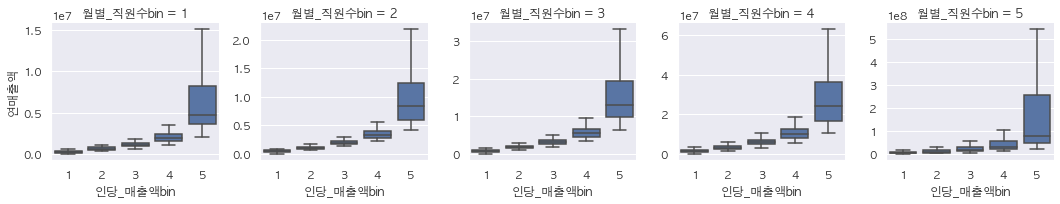

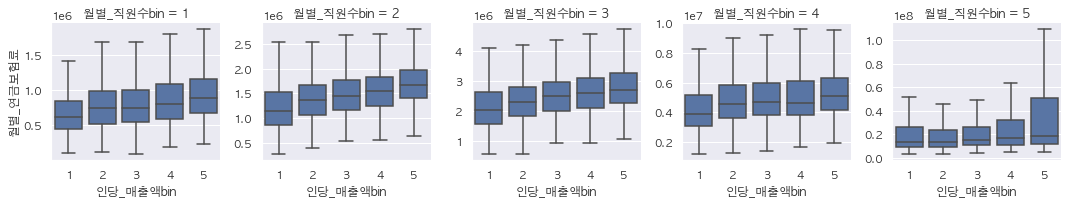

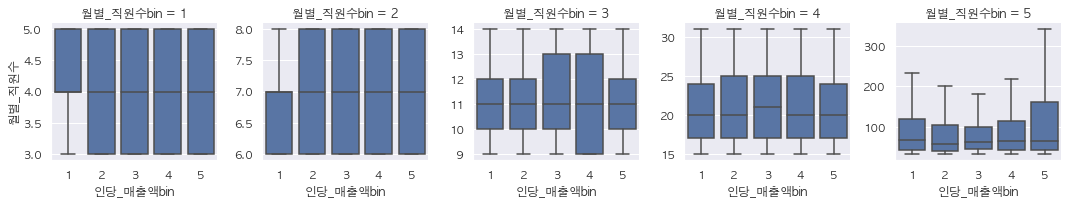

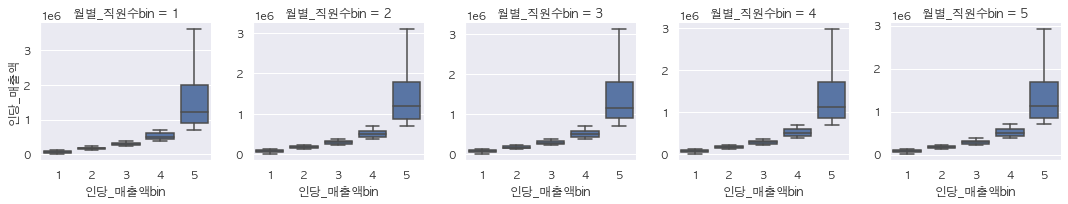

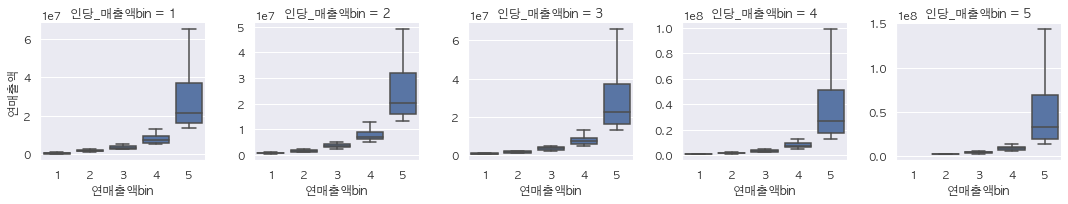

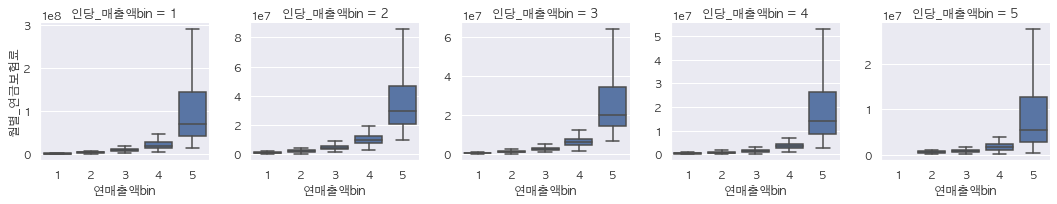

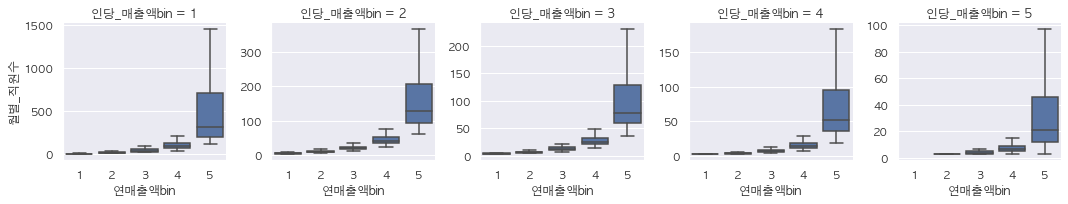

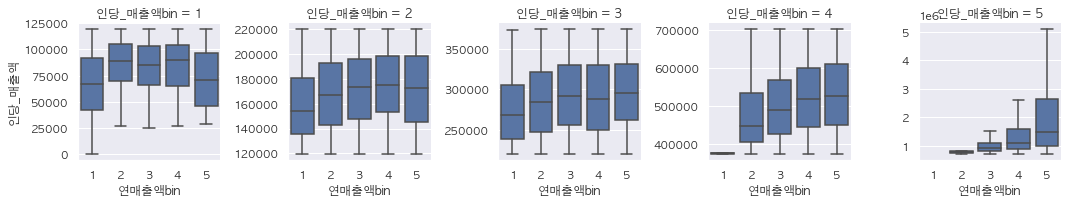

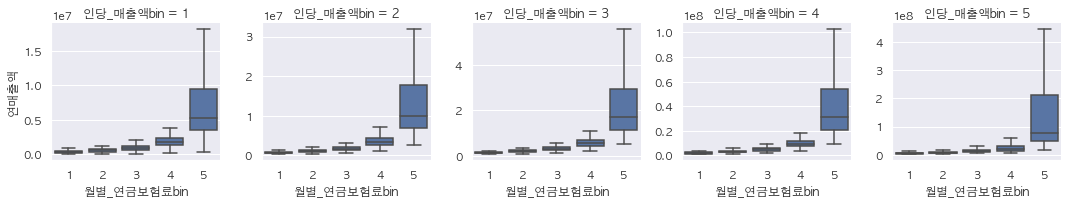

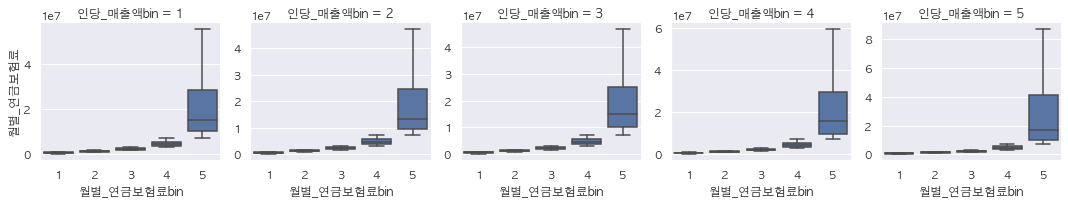

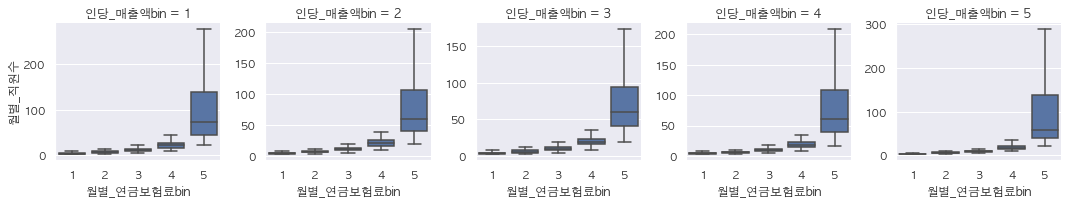

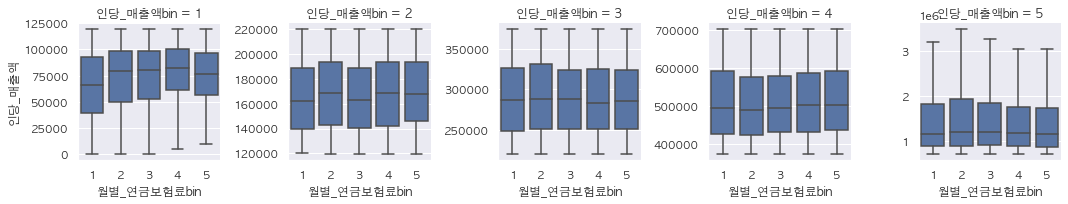

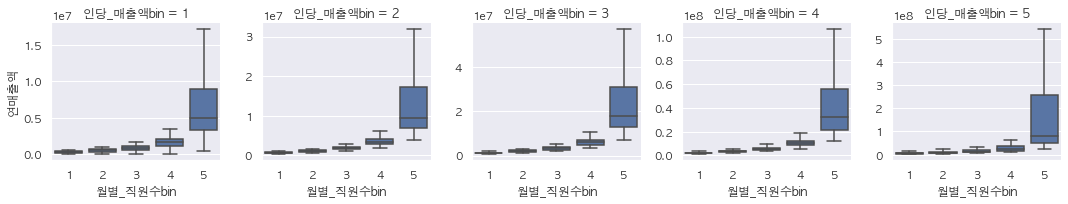

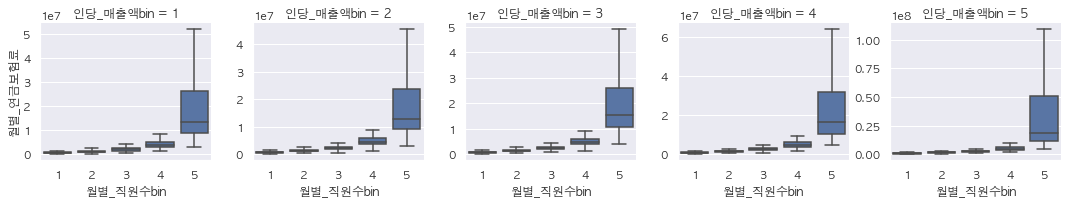

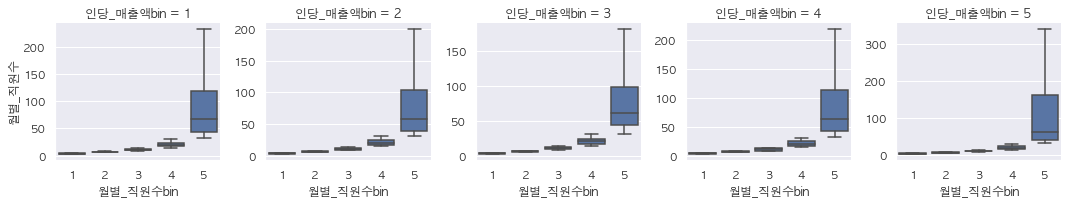

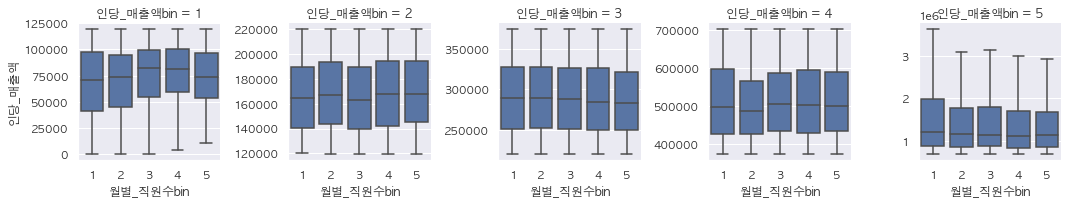

In [10]:
# 마스터 컬럼 리스트
boxplot_bin_column = ['연매출액bin','월별_연금보험료bin', '월별_직원수bin','인당_매출액bin']

# 마스터 컬럼 리스트를 기준으로 구분
for column in boxplot_bin_column:
    
    for column_2 in boxplot_bin_column:
        # X축이 구분과 같지 않은 경우 (ex. '연매출액bin' 구분으로 차트 쪼개는데, '연매출액bin'이 X축으로 안쓰이는 경우)
        if column_2 != column:
            # Y축은 '연매출액','월별_연금보험료','월별_직원수', '1인당_매출액' 네 가지 경우 모두 확인
            for column_3 in boxplot_bin_column:
                g = sns.FacetGrid(wanted_nps_df, col=column, sharey=False)
                g.map(sns.boxplot, column_2, column_3[:-3], order=bin_labels, showfliers=False);

#### 2. Scatter chart 해석 요약

--------

- 일정 규모 이상의 회사는 월별 직원수와 월별 연금보험료가 연매출액과 양의 상관관계가 있다.
- 하지만 일정 규모 이상의 회사에서는 직원이 많을수록 매출이 작아지는 약한 관계를 확인할 수 있다.<br>1인당 매출액이 클수록 연매출액에 작아지는 관계 역시 확인할 수 있다.
- 또한, 월별 연금보험료는 일정 규모 이상의 회사에선 연매출액과 1인당 매출액과 관계가 적어진다.

##### (추론)
1. 직원수와 연금보험료가 많으면 매출이 크다고 볼 수 있지만, 매출의 질이 반드시 높다고 볼 수 없다고 추측함.
2. 일정 규모 이상이 되면, 연봉테이블이 넓어져 연금보험료를 가치 판단의 기준으로 보기 무리가 있다고 추측함.

##### (정리)
1. 적정 수준의 직원과 연봉을 유지하면서, 매출이 높은 회사가 가치가 큰 회사로 보인다.

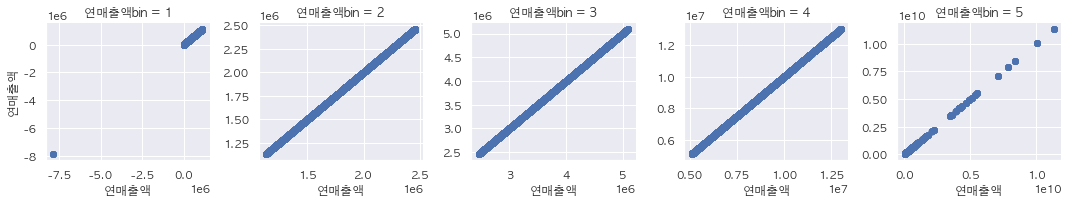

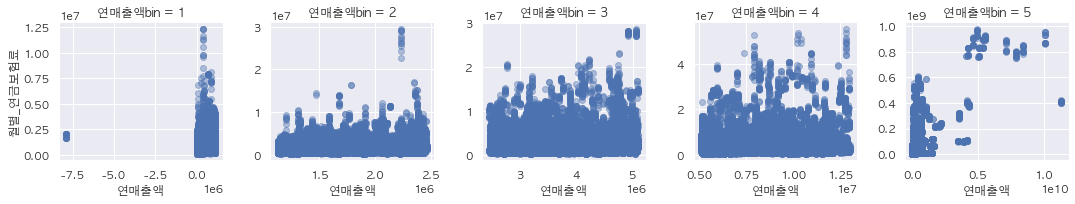

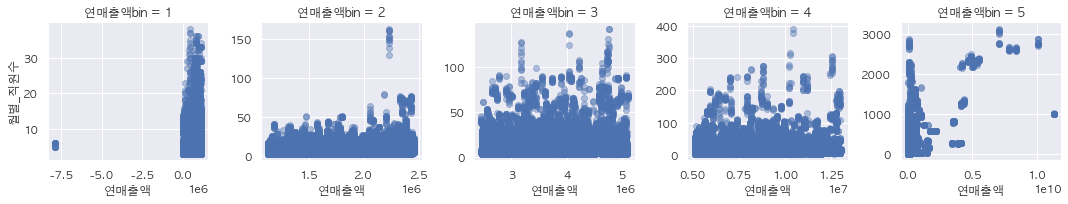

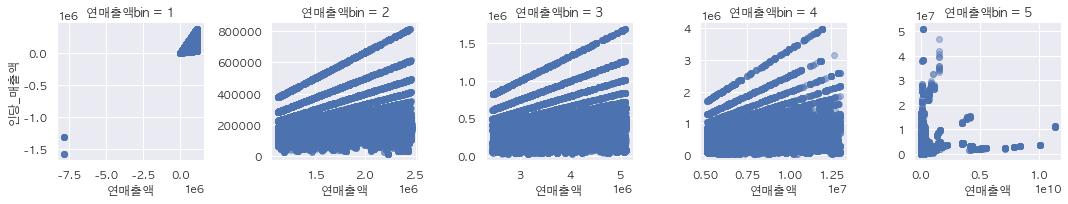

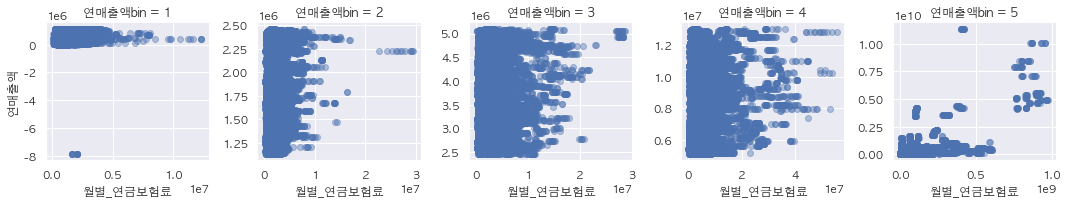

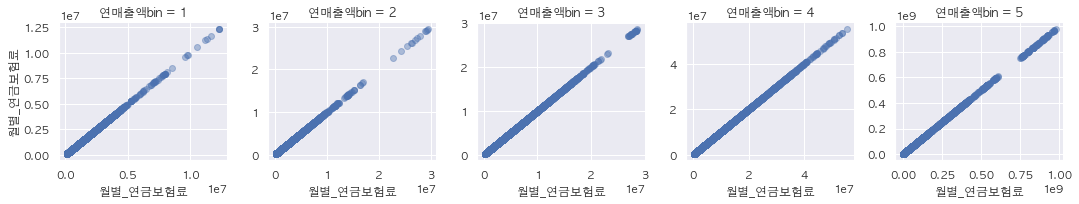

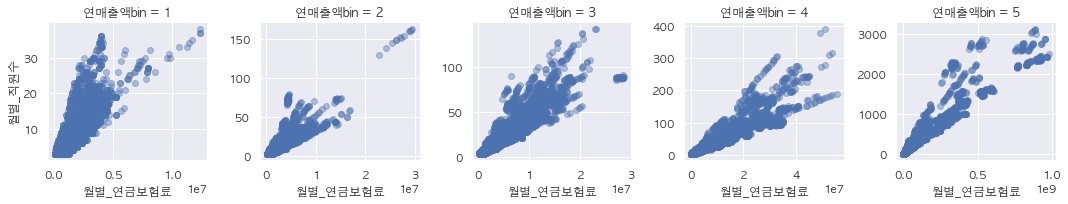

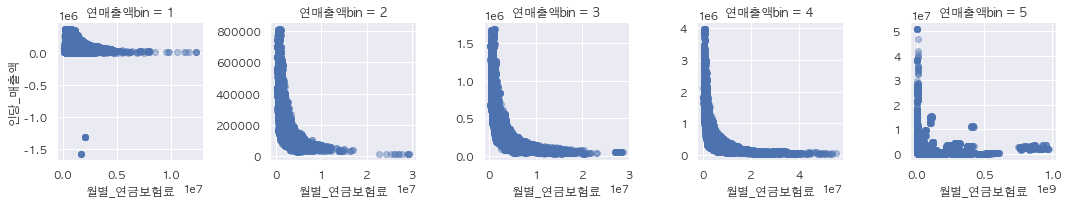

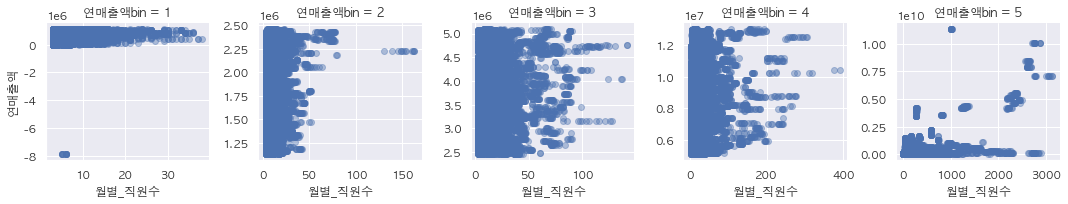

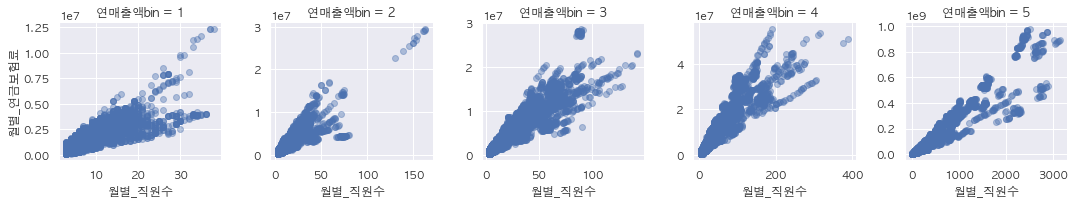

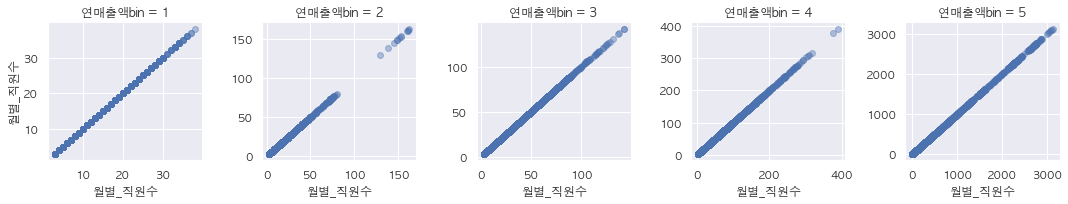

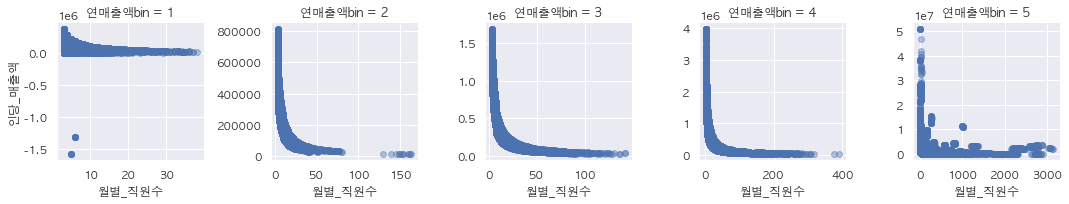

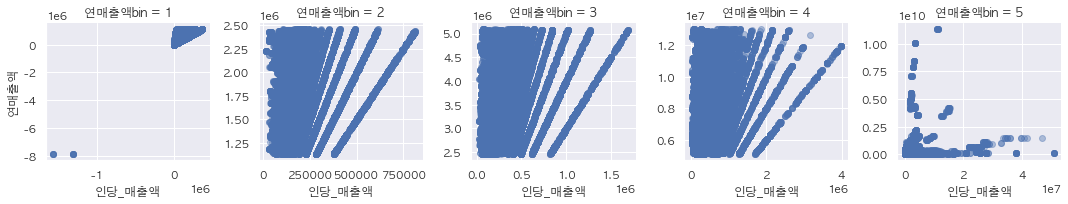

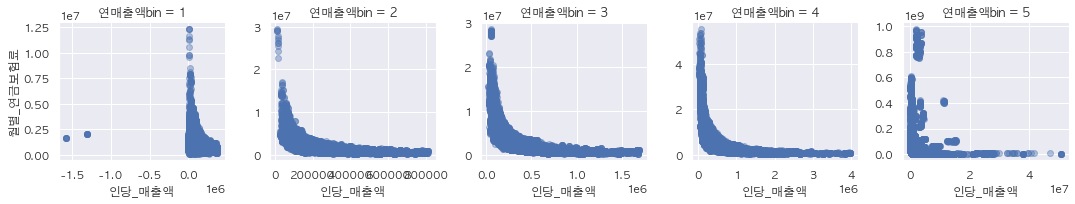

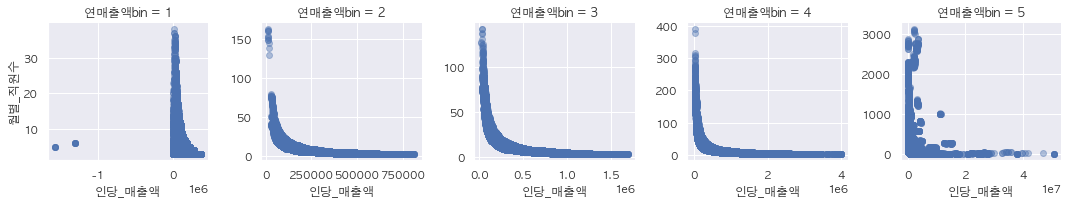

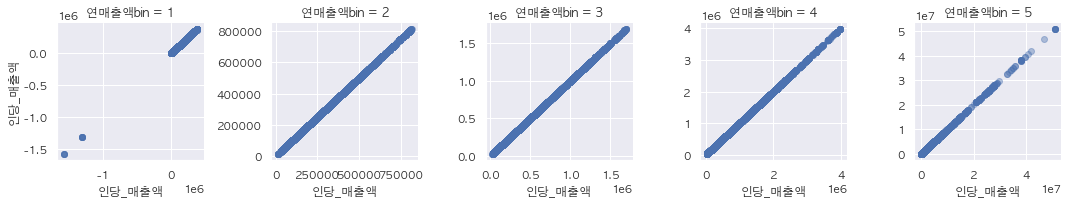

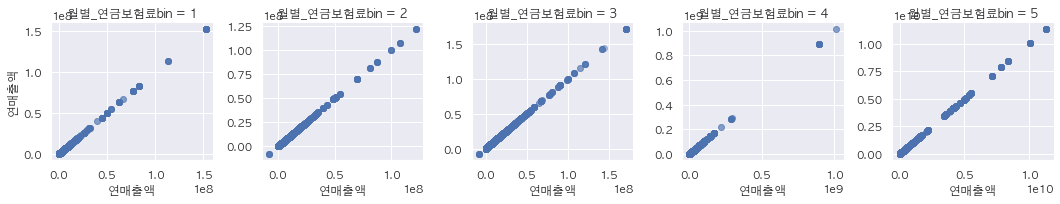

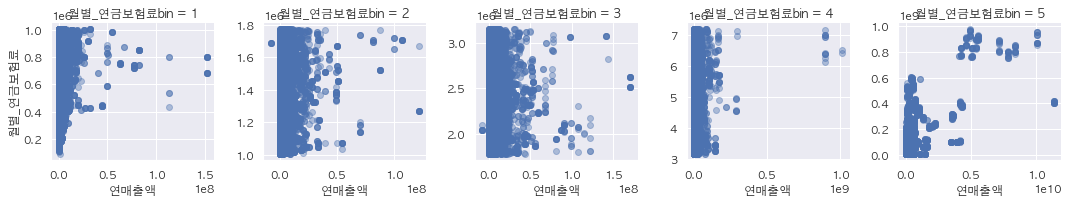

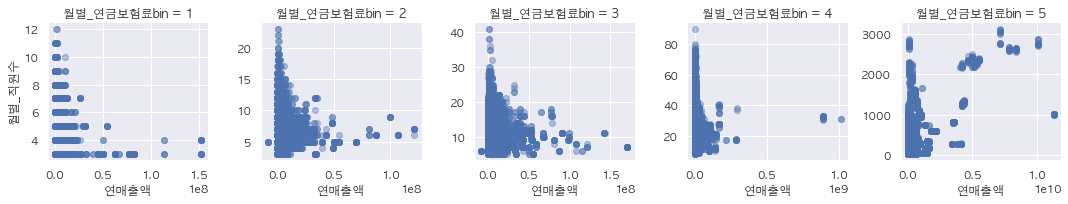

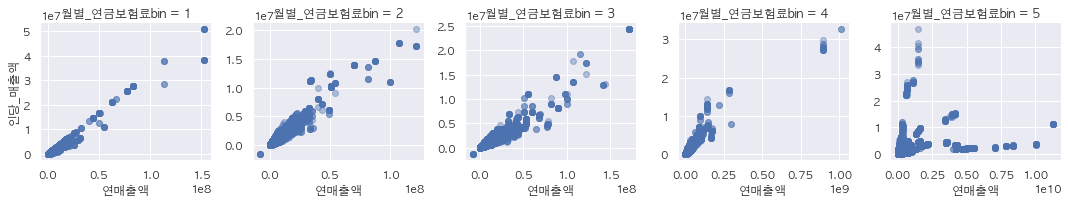

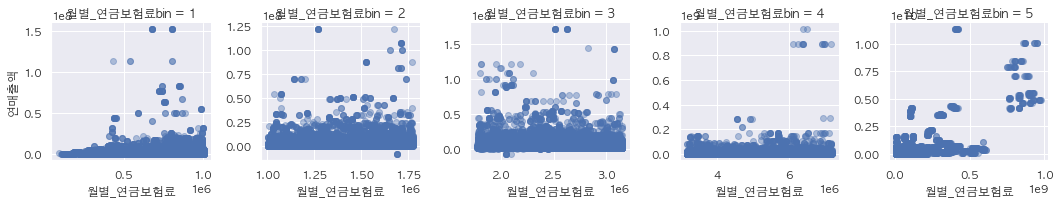

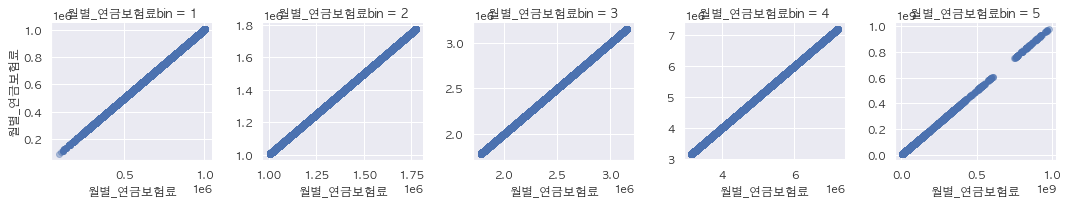

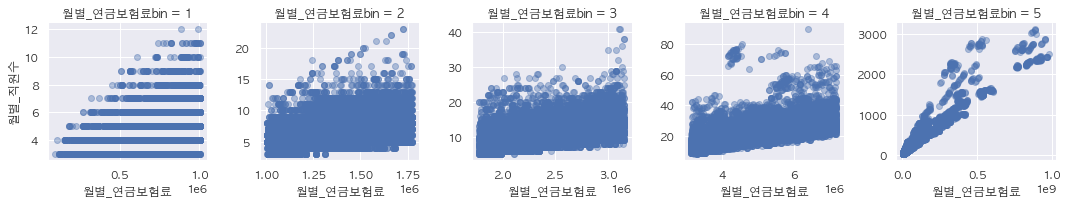

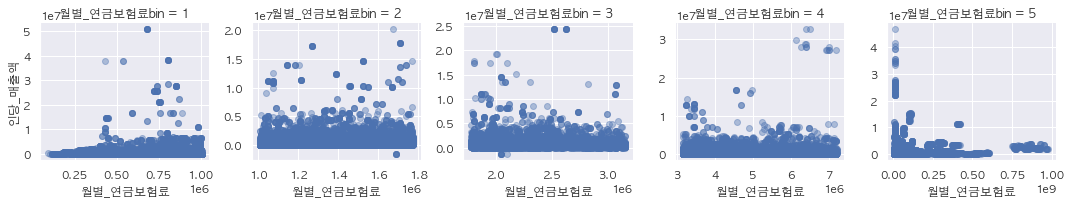

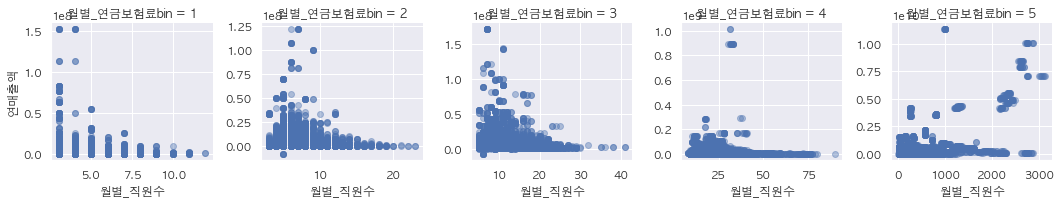

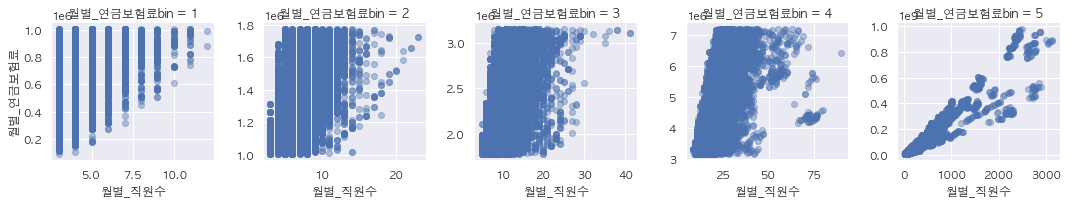

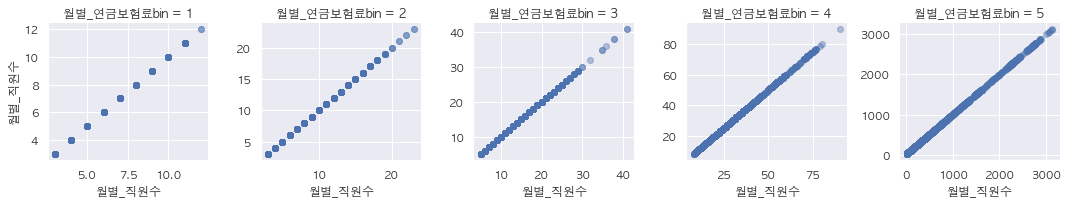

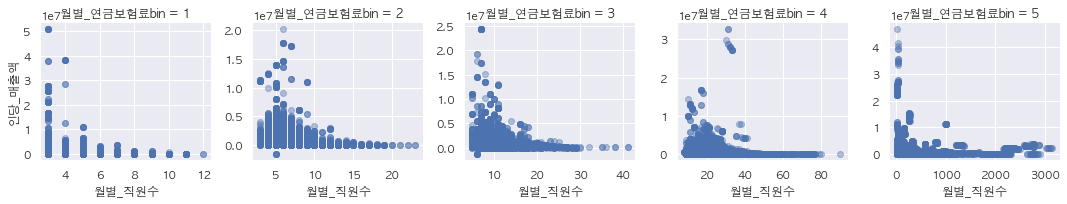

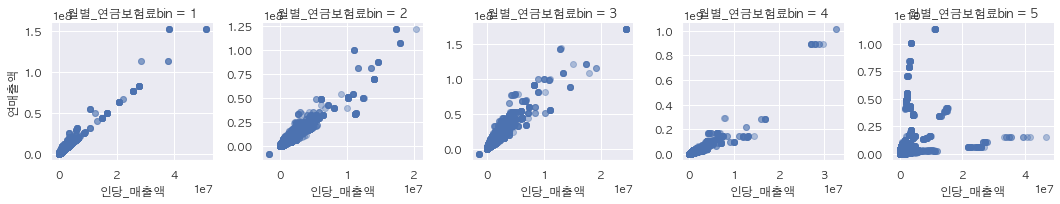

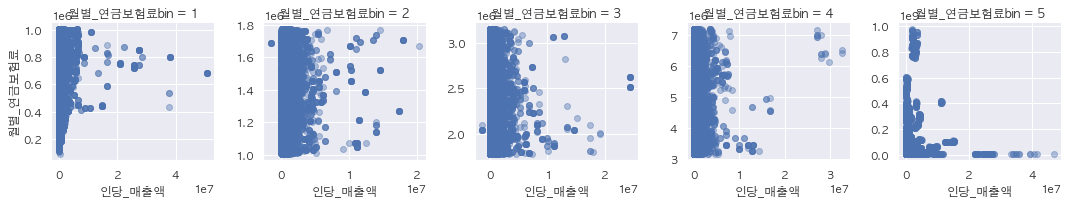

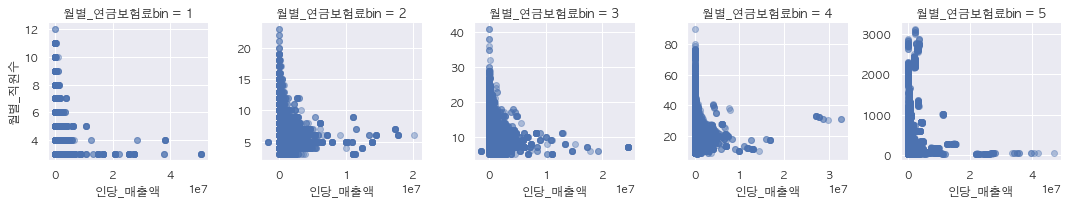

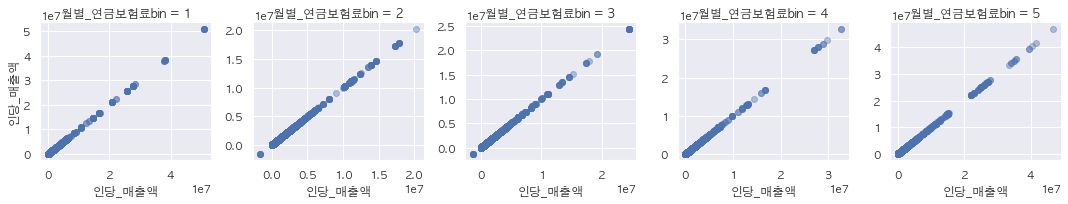

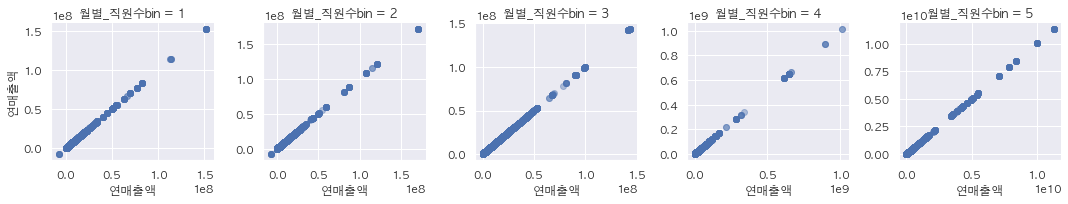

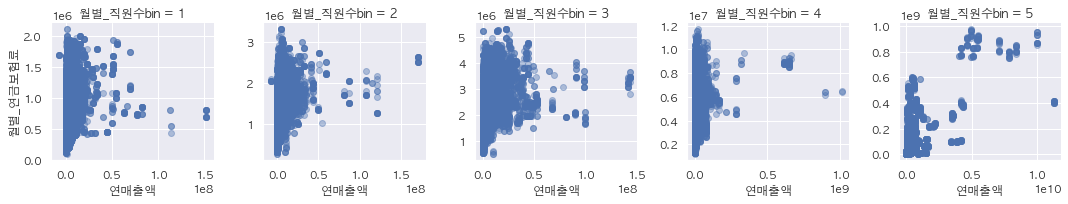

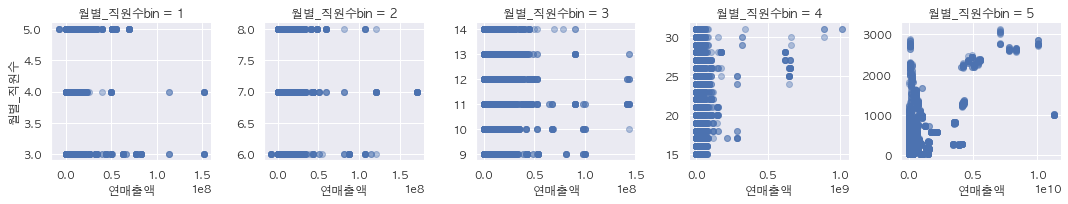

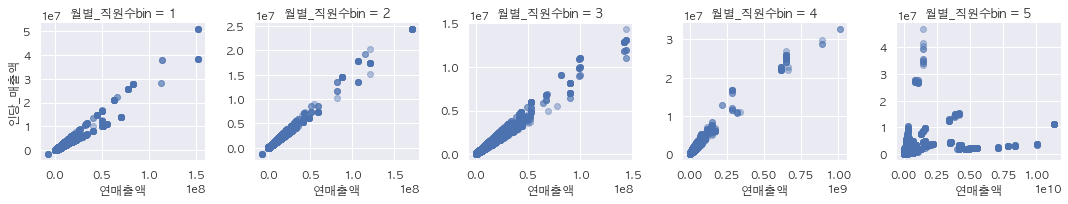

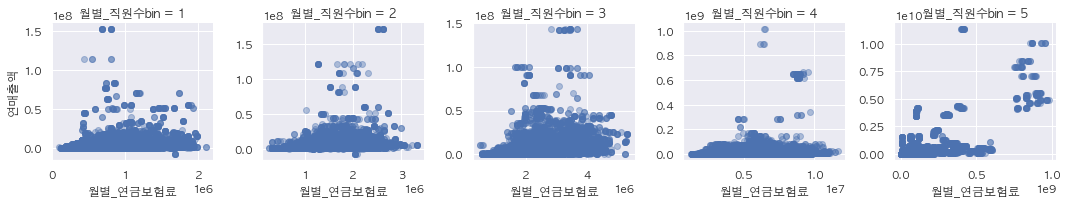

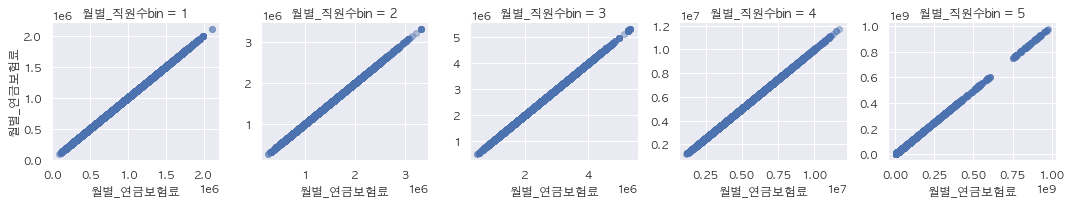

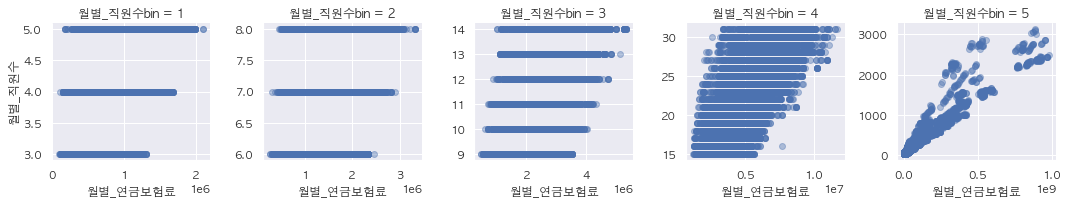

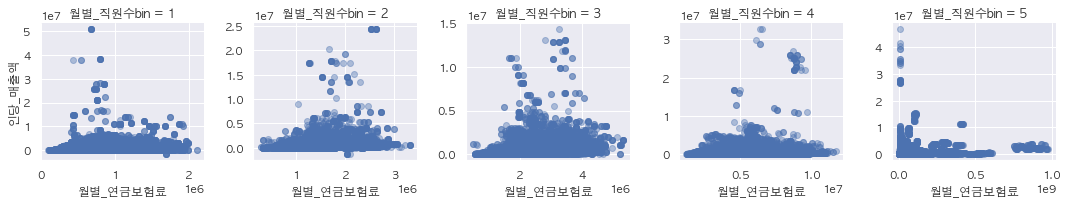

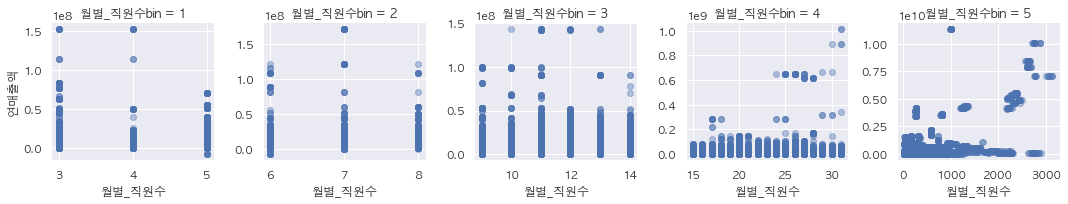

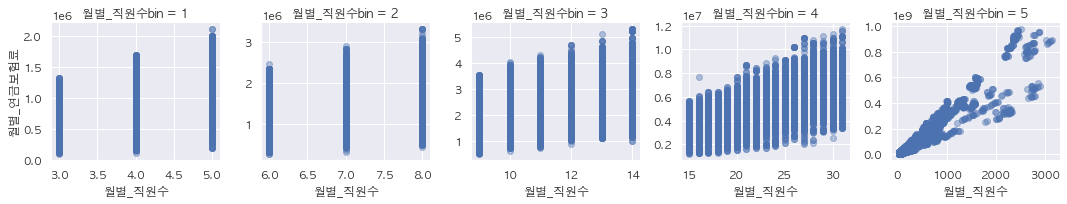

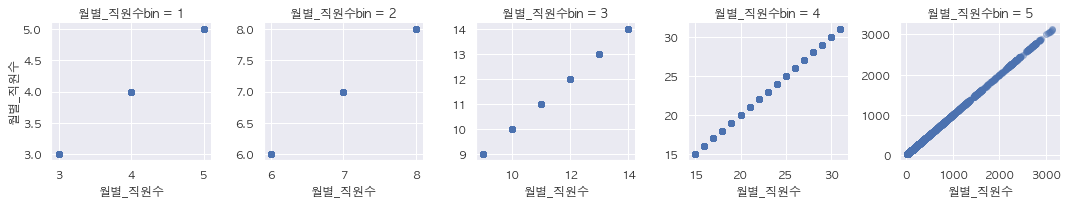

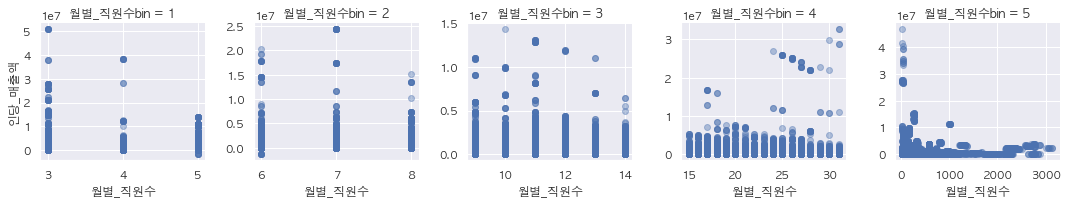

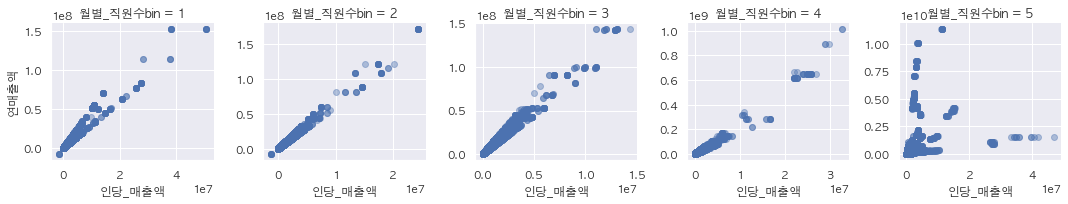

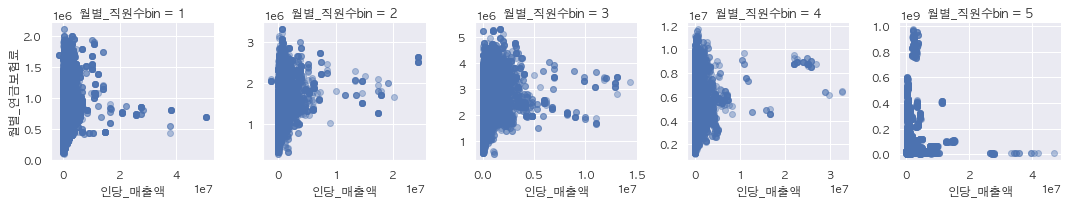

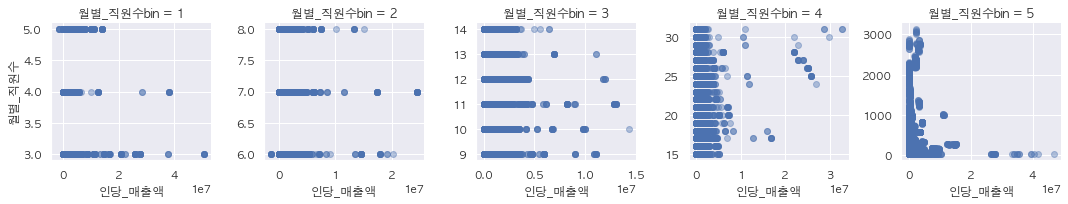

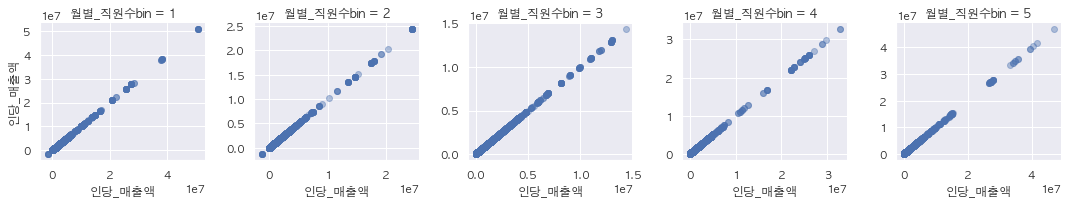

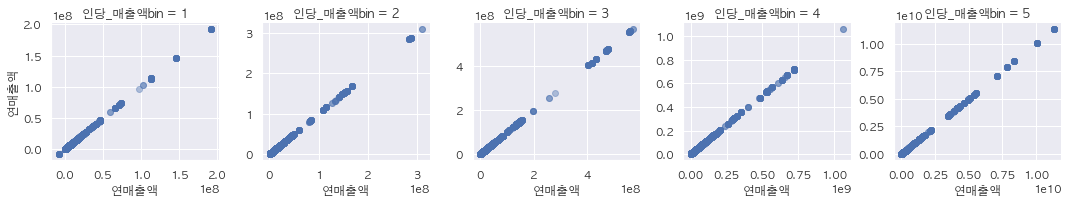

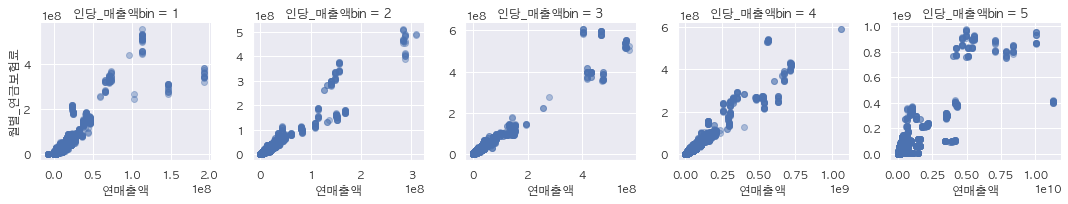

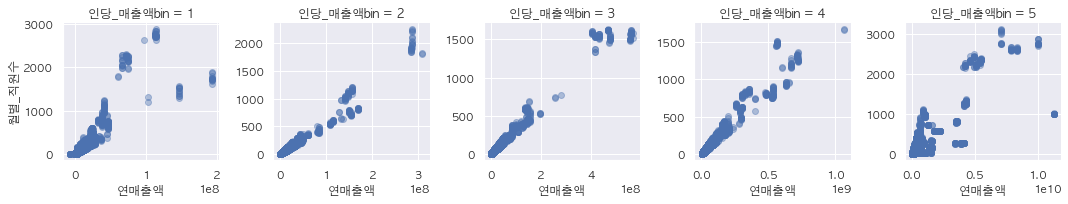

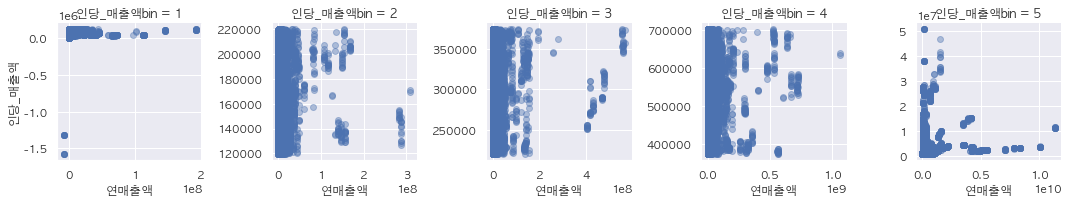

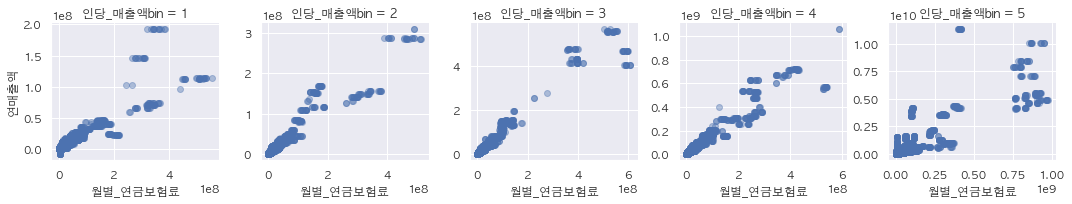

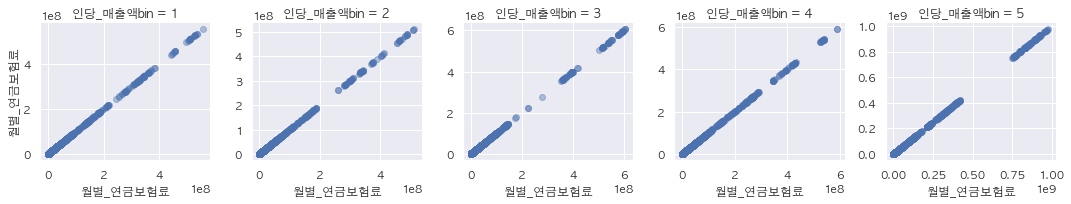

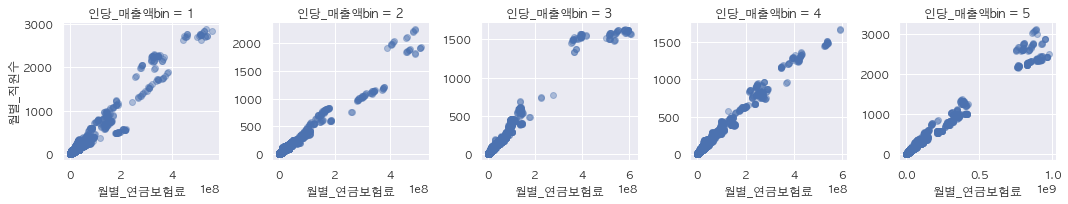

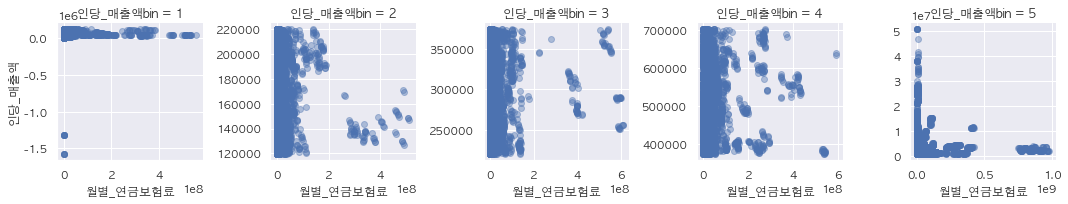

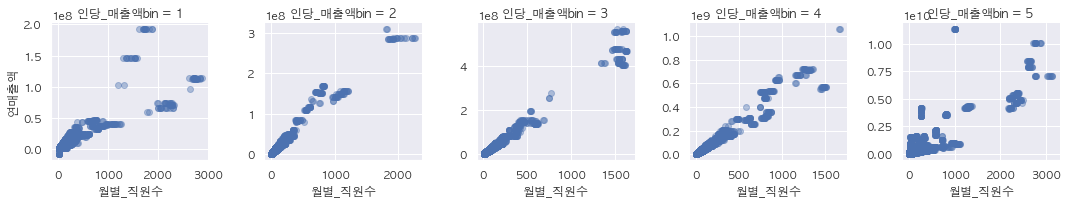

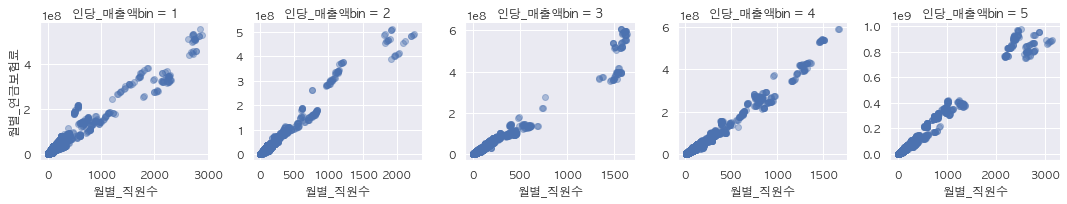

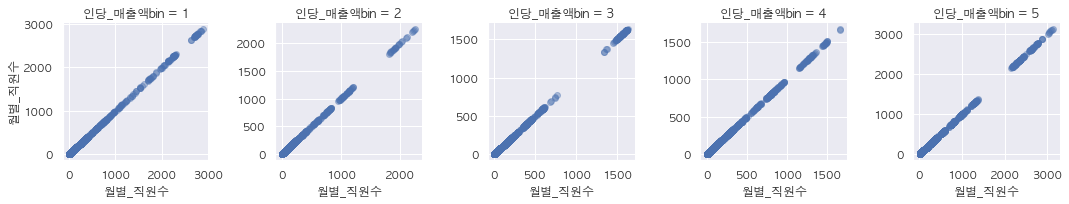

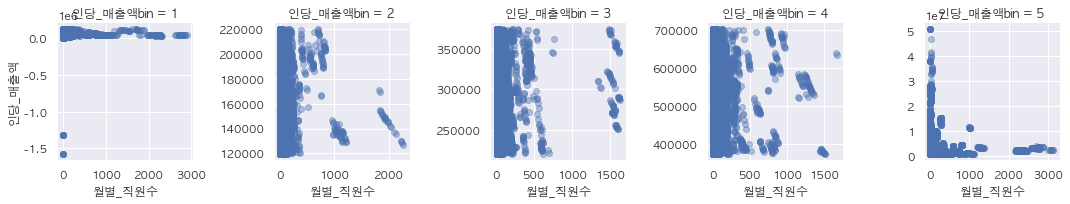

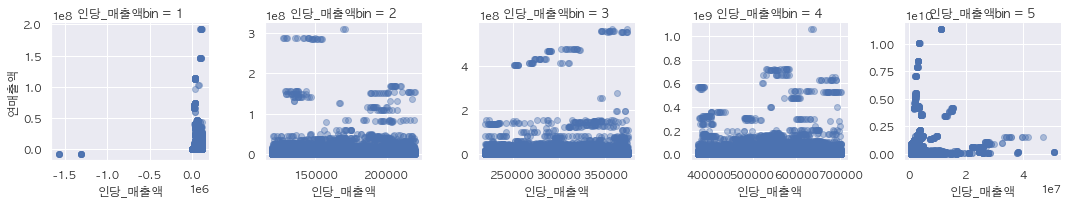

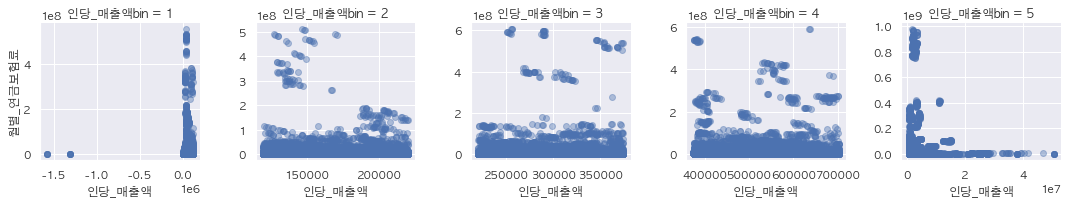

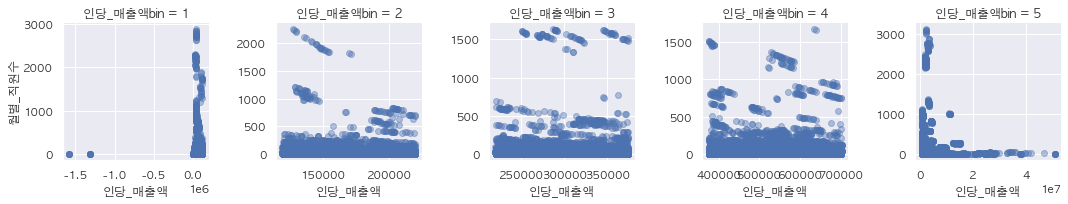

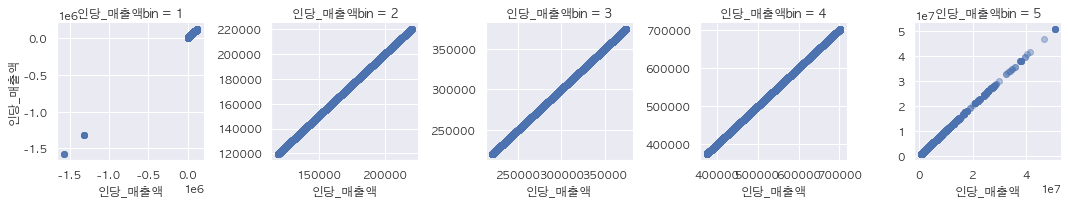

In [11]:
# 마스터 컬럼 리스트를 기준으로 구분
for column in boxplot_bin_column:
    
    for column_2 in boxplot_bin_column:
       
            # X, Y축 모두 '연매출액','월별_연금보험료','월별_직원수', '1인당_매출액' 네 가지 경우 모두 확인
            for column_3 in boxplot_bin_column:
                
                g = sns.FacetGrid(wanted_nps_df, col=column, sharex=False, sharey=False)
                g.map(plt.scatter, column_2[:-3], column_3[:-3], alpha = .4); #alpha는 점의 투명도

### Binning을 기준으로 후보 기업군 추출
 - bin을 Score 기준으로 설정하고,<br>연매출액bin, 월별 연금보험료bin, 월별 직원수bin, 1인당 매출액bin이 모두 5번인 기업 추출 

In [14]:
find_unicon = wanted_nps_df.query('연매출액bin == 5 & 월별_연금보험료bin == 5 & 월별_직원수bin == 5 & 인당_매출액bin == 5')

In [26]:
print('후보 기업수: ', len(set(find_unicon['회사ID'])))
print('후보 기업 리스트: ')
print(find_unicon['회사ID'].unique())

후보 기업수:  165
후보 기업 리스트: 
[233757 231080 420304 139359 130322 141220 232757 127060 130729 296476
 231606 297175 141714 419977 231260 231499 130203 381180 126606 381344
 136174 126831 296986 231897 297441 227414 227989 134484 295618 420046
 138269 129828 133431 139922 232834 133951 131723 127669    102 231703
 141095 127511 126814 382565 135061 232214 294649 131485 440030 128896
 297077 294530   5202 139393 137497 128539 137166     95 294964 138077
 130386   2842 383195 297874 294620 297327 127090 231972 404634 232399
 128174 298404 297496 130911 296795 297552 135668 419998 231173 139080
 135798 128638 133019 295805 133681 130577 490974 420008 630190 294367
   1125 382656 131872 132156 295986 137377 131049 298044 440613 142535
 130927 442439 299864 426429 143050 227415 233530 130387 138709 420237
 383250 419945 296071     63 143187 126674 232454 128440 231384 127366
 442467 133493 382850 140574 138433 404804 231383 441735 132345 232159
 232779 142671 299529 420092 136566    597 140498   

### Next step. 후보 기업을 대상으로 세부 분석 필요